In [57]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
visitors = pd.read_csv("visitors.csv")
orders = pd.read_csv("orders.csv")

# Let's check the data for validity

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [12]:
visitors.groupby("group")['visitors'].sum().head()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [13]:
visitors.groupby('group')['date'].agg(['min', 'max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
orders.groupby('group')['date'].agg(['min', 'max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


In [19]:
group_a_visitors = set(orders[orders['group'] == 'A']['visitorId'])

group_b_visitors = set(orders[orders['group'] == 'B']['visitorId'])

common_visitors = group_a_visitors.intersection(group_b_visitors)

len(common_visitors)

58

In [20]:
common_visitors

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

In [21]:
orders[orders['visitorId'] == 1333886533].head()

,transactionId,visitorId,date,revenue,group
450,1750160666,1333886533,2019-08-06,1460,A
688,511953429,1333886533,2019-08-29,2950,B


In [22]:
orders_clean = orders[~orders['visitorId'].isin(common_visitors)]

In [23]:
orders_clean.groupby("group").agg({\
    'transactionId': 'nunique',\
    'revenue': ['sum', 'mean', 'median', 'min', 'max']
                            
})

transactionId  revenue                                  
            nunique      sum         mean  median min      max
group                                                         
A               468  3364656  7189.435897  3090.0  50    92550
B               548  5068972  9249.948905  2898.5  50  1294500

In [353]:
duplicate_count = orders_clean.duplicated(subset=['transactionId']).sum()
duplicate_count

0

In [354]:
transactions_per_user = orders_clean.groupby(['visitorId', 'group']).size().reset_index(name='transaction_count')

average_transactions_per_group = transactions_per_user.groupby('group')['transaction_count'].mean()

print("Average amount of transactions per user in each group:")
print(average_transactions_per_group)


Average amount of transactions per user in each group:
group
A    1.051685
B    1.037879
Name: transaction_count, dtype: float64


# Revenue data distribution

<AxesSubplot:xlabel='group', ylabel='revenue'>

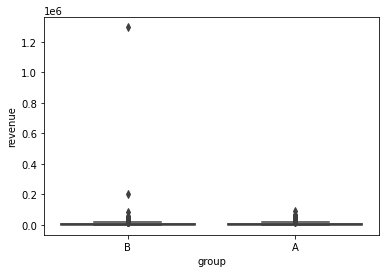

In [300]:
sns.boxplot(x="group", y="revenue", data=orders_clean)

In [301]:
orders_clean['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [24]:
Q1 = orders_clean['revenue'].quantile(0.25)
Q3 = orders_clean['revenue'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR

filtered_data = orders_clean[(orders_clean['revenue'] > lower_bound) & (orders_clean['revenue'] < upper_bound)]

In [358]:
filtered_data['revenue'].describe()

count      943.000000
mean      4600.674443
std       4917.973115
min         50.000000
25%       1100.000000
50%       2590.000000
75%       6249.000000
max      19660.000000
Name: revenue, dtype: float64

<AxesSubplot:xlabel='group', ylabel='revenue'>

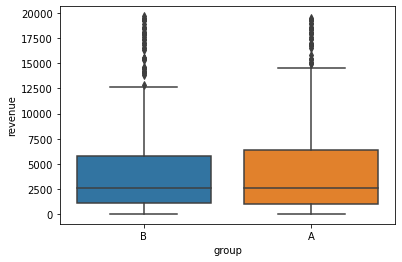

In [25]:
sns.boxplot(x="group", y="revenue", data=filtered_data)

# Let's compare the samples by revenue

Firstly let's compare the original dataframe, that contain outliers.

In [38]:
from scipy.stats import mannwhitneyu

group_A_revenue = orders_clean[orders_clean['group'] == 'A']['revenue']
group_B_revenue = orders_clean[orders_clean['group'] == 'B']['revenue']

statistic, p_value = mannwhitneyu(group_A_revenue, group_B_revenue)

print("Test statistic:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the conversion rates")
else:
    print("There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.")


Test statistic: 129236.5
p-значение: 0.8294908998149533
There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.


Secondly  let's compare the dataframe, that does not contain outliers.

In [41]:
group_A_revenue = filtered_data[filtered_data['group'] == 'A']['revenue']
group_B_revenue = filtered_data[filtered_data['group'] == 'B']['revenue']

statistic, p_value = mannwhitneyu(group_A_revenue, group_B_revenue)

print("Test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the conversion rates")
else:
    print("There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.")


Test statistic: 111265.0
p-value: 0.8456531955188368
There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.


In [61]:
# Separate the revenue data for each group
revenue_group_a = orders_clean[orders_clean['group'] == 'A']['revenue']
revenue_group_b = orders_clean[orders_clean['group'] == 'B']['revenue']

# Define a function for bootstrapping
def bootstrap(data, n_bootstraps=10000):
    """Function to perform bootstrapping."""
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(sample.mean())
    return bootstrapped_means

# Get the bootstrapped means for both groups
bootstrapped_means_a = bootstrap(revenue_group_a)
bootstrapped_means_b = bootstrap(revenue_group_b)

# Calculate the difference in means between the two groups
mean_difference = np.mean(bootstrapped_means_b) - np.mean(bootstrapped_means_a)

# Calculate the p-value
combined_means = bootstrapped_means_a + bootstrapped_means_b
observed_difference = np.mean(bootstrapped_means_b) - np.mean(bootstrapped_means_a)
num_samples = len(combined_means)

# Calculate the proportion of differences greater than or equal to the observed difference
p_value = np.sum(combined_means >= observed_difference) / num_samples

# Print the results
if p_value < 0.05:
    print("There is a statistically significant difference between Group B and Group A.")
    print(p_value)
else:
    print("There is no statistically significant difference between Group B and Group A.")
    print(p_value)



There is no statistically significant difference between Group B and Group A.
1.0


No handles with labels found to put in legend.


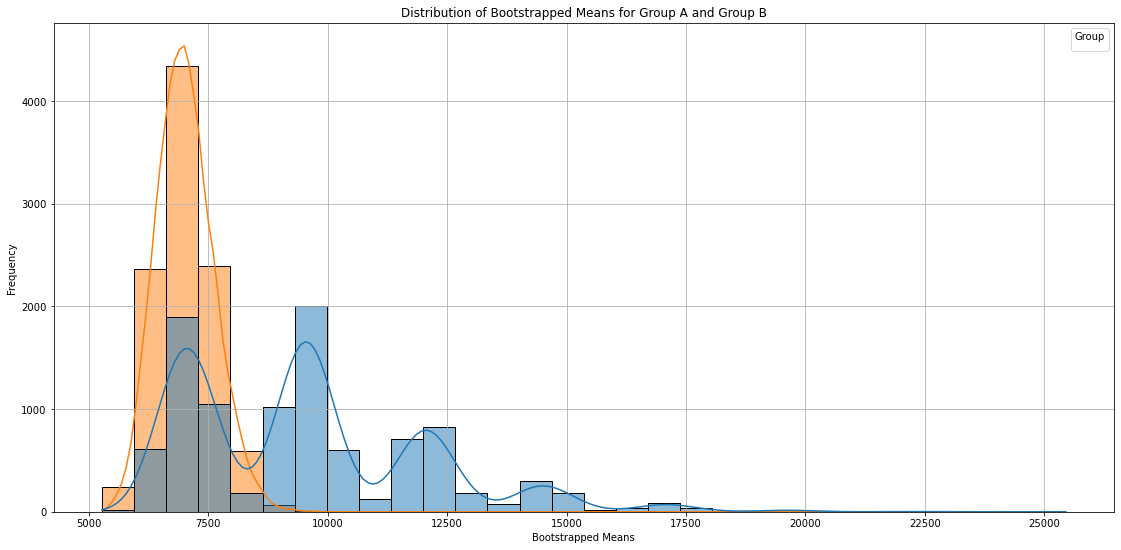

In [62]:
# Combine bootstrapped means and group labels into a DataFrame
bootstrapped_data = pd.DataFrame({
    'Bootstrapped Means': bootstrapped_means_a + bootstrapped_means_b,
    'Group': ['Group A'] * len(bootstrapped_means_a) + ['Group B'] * len(bootstrapped_means_b)
})

# Plot the distribution of bootstrapped means for both groups using seaborn
plt.figure(figsize=(19, 9))
sns.histplot(data=bootstrapped_data, x='Bootstrapped Means', hue='Group', bins=30, kde=True)
plt.title('Distribution of Bootstrapped Means for Group A and Group B')
plt.xlabel('Bootstrapped Means')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.grid(True)
plt.show()


# Let's compare the conversion rates

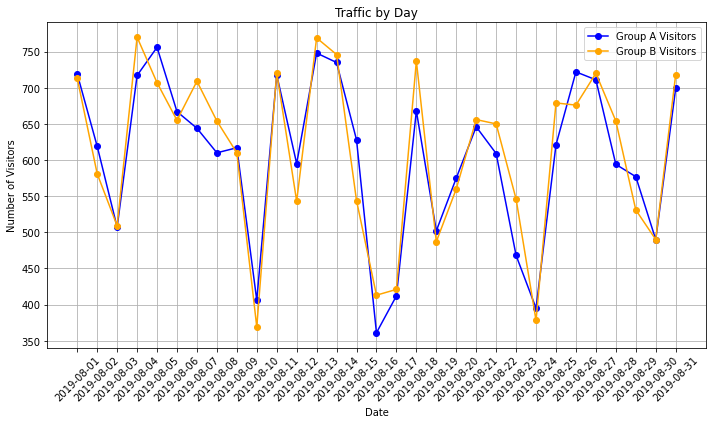

In [344]:
group_A = visitors[visitors['group'] == 'A']
group_B = visitors[visitors['group'] == 'B']

group_A = group_A.sort_values(by='date')
group_B = group_B.sort_values(by='date')

plt.figure(figsize=(10, 6))
plt.plot(group_A['date'], group_A['visitors'], label='Group A Visitors', marker='o', color='blue')
plt.plot(group_B['date'], group_B['visitors'], label='Group B Visitors', marker='o', color='orange')

plt.title('Traffic by Day')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


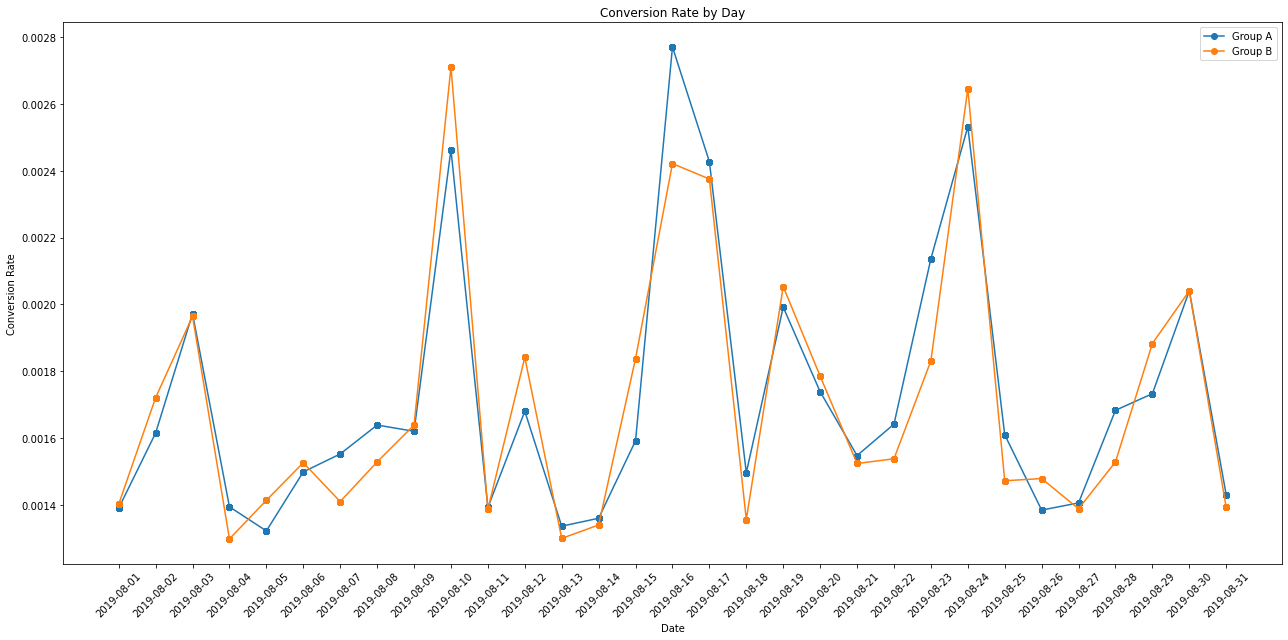

In [345]:
data = pd.merge(orders_clean, visitors, on=['date', 'group'])

data['conversion'] = data['transactionId'].notnull().astype(int) / data['visitors']

group_A = data[data['group'] == 'A']
group_B = data[data['group'] == 'B']

group_A = group_A.sort_values(by='date')
group_B = group_B.sort_values(by='date')

plt.figure(figsize=(18, 9))
plt.plot(group_A['date'], group_A['conversion'], label='Group A', marker='o')
plt.plot(group_B['date'], group_B['conversion'], label='Group B', marker='o')
plt.title('Conversion Rate by Day')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [346]:
total_visitors_A = visitors[visitors['group'] == 'A']['visitors'].sum()
total_visitors_B = visitors[visitors['group'] == 'B']['visitors'].sum()

total_orders_A = orders_clean[orders_clean['group'] == 'A']['transactionId'].nunique()
total_orders_B = orders_clean[orders_clean['group'] == 'B']['transactionId'].nunique()

conversion_A = total_orders_A / total_visitors_A * 100
conversion_B = total_orders_B / total_visitors_B * 100

conversion_difference = conversion_B - conversion_A

print("Conversion in group A:", conversion_A)
print("Conversion in group B:", conversion_B)
print("Diffrence between B и A:", conversion_difference)


Conversion in group A: 2.497865072587532
Conversion in group B: 2.897018397124128
Diffrence between B и A: 0.3991533245365959


In [59]:
from statsmodels.stats.proportion import proportions_ztest

visitors_A = visitors[visitors['group'] == 'A']['visitors'].sum()
orders_A = orders_clean[orders_clean['group'] == 'A']['transactionId'].nunique()

visitors_B = visitors[visitors['group'] == 'B']['visitors'].sum()
orders_B = orders_clean[orders_clean['group'] == 'B']['transactionId'].nunique()

z_stat, p_value = proportions_ztest([orders_A, orders_B], [visitors_A, visitors_B])

print("Z-statistic:", z_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the conversion rates")
else:
    print("There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.")

Z-statistic: 0.5997542039409525
p-value: 0.5486700581666273
There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.


In [58]:
visitors_A_sum = visitors[visitors['group'] == 'A']['visitors'].sum()
orders_A_sum = orders_clean[orders_clean['group'] == 'A']['transactionId'].nunique()

visitors_B_sum = visitors[visitors['group'] == 'B']['visitors'].sum()
orders_B_sum = orders_clean[orders_clean['group'] == 'B']['transactionId'].nunique()

conversion_rate_A = orders_A_sum / visitors_A_sum
conversion_rate_B = orders_B_sum / visitors_B_sum

t_statistic, p_value = stats.ttest_ind([conversion_rate_A] * visitors_A_sum, [conversion_rate_B] * visitors_B_sum)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the conversion rates")
else:
    print("There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.")

print("p-value:",p_value)


NameError: name 'stats' is not defined

In [355]:
from statsmodels.stats.proportion import proportion_confint

# Вычисляем доверительные интервалы для группы A
conf_int_A = proportion_confint(orders_A_sum, visitors_A_sum, alpha=0.05, method='normal')

# Вычисляем доверительные интервалы для группы B
conf_int_B = proportion_confint(orders_B_sum, visitors_B_sum, alpha=0.05, method='normal')

print("Доверительный интервал для группы A:", conf_int_A)
print("Доверительный интервал для группы B:", conf_int_B)


Доверительный интервал для группы A: (0.022744043481189843, 0.027213257970560796)
Доверительный интервал для группы B: (0.026580032922613406, 0.03136033501986915)


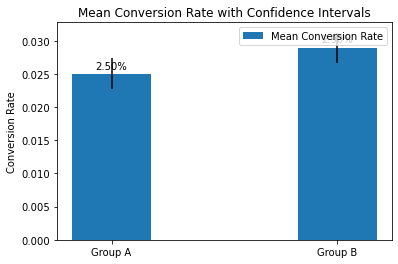

In [356]:
import numpy as np
import matplotlib.pyplot as plt

# Доверительные интервалы для групп A и B
conf_int_A = proportion_confint(orders_A_sum, visitors_A_sum, alpha=0.05, method='normal')
conf_int_B = proportion_confint(orders_B_sum, visitors_B_sum, alpha=0.05, method='normal')

# Средние конверсионные коэффициенты для групп A и B
mean_conversion_A = orders_A_sum / visitors_A_sum
mean_conversion_B = orders_B_sum / visitors_B_sum

# Создание графика
labels = ['Group A', 'Group B']
mean_values = [mean_conversion_A, mean_conversion_B]
conf_intervals = [conf_int_A, conf_int_B]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, mean_values, width, label='Mean Conversion Rate', yerr=[(ci[1]-mean_val, ci[0]-mean_val) for mean_val, ci in zip(mean_values, conf_intervals)])

ax.set_ylabel('Conversion Rate')
ax.set_title('Mean Conversion Rate with Confidence Intervals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Добавляем значения конверсионных коэффициентов над столбцами
for bar, mean_val in zip(bars, mean_values):
    height = bar.get_height()
    ax.annotate(f'{mean_val:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [365]:
import numpy as np

# Разделение данных на децили для каждой группы
deci_revenue_A = np.percentile(orders_clean[orders_clean['group'] == 'A']['revenue'], np.arange(0, 100, 10))
deci_revenue_B = np.percentile(orders_clean[orders_clean['group'] == 'B']['revenue'], np.arange(0, 100, 10))

# Вывод децильных значений выручки для группы A
print("Децильные значения выручки для группы A:")
for i, decile in enumerate(deci_revenue_A):
    print(f"Дециль {i+1}: {decile}")

# Вывод децильных значений выручки для группы B
print("\nДецильные значения выручки для группы B:")
for i, decile in enumerate(deci_revenue_B):
    print(f"Дециль {i+1}: {decile}")

# Сравнение выборок между группами A и B
# Например, можно использовать t-тест или другие методы
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(orders_clean[orders_clean['group'] == 'A']['revenue'],
                                  orders_clean[orders_clean['group'] == 'B']['revenue'])

print("\nРезультаты сравнения выборок выручки между группами A и B:")
print("t-статистика:", t_statistic)
print("p-value:", p_value)


Децильные значения выручки для группы A:
Дециль 1: 50.0
Дециль 2: 420.0
Дециль 3: 894.0
Дециль 4: 1451.0
Дециль 5: 2088.0
Дециль 6: 3090.0
Дециль 7: 4515.199999999999
Дециль 8: 6589.5
Дециль 9: 10746.000000000005
Дециль 10: 17990.0

Децильные значения выручки для группы B:
Дециль 1: 50.0
Дециль 2: 490.0
Дециль 3: 992.0
Дециль 4: 1490.0
Дециль 5: 2040.0000000000005
Дециль 6: 2898.5
Дециль 7: 4181.0
Дециль 8: 5834.999999999999
Дециль 9: 9850.0
Дециль 10: 17990.0

Результаты сравнения выборок выручки между группами A и B:
t-статистика: -0.7770483389297023
p-value: 0.43731148527890473


In [42]:
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [54]:
import hashlib

# Функция для определения группы на основе хэша
def get_group(hash_value):
    if hash_value % 2 == 0:
        return 'A'
    else:
        return 'B'

# Применяем хэш-функцию к столбцу визиторов и добавляем столбец group_hash
orders_clean['group_hash'] = orders_clean['visitorId'].apply(lambda x: int(hashlib.sha256(str(x).encode()).hexdigest(), 16) % 2)

# Определяем группу A или B на основе group_hash
orders_clean['group'] = orders_clean['group_hash'].apply(get_group)

# Выводим результат
orders_clean.head()


/var/folders/fq/rljsbp89721c0jlzkh6vn6080000gn/T/ipykernel_1195/4171627909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['group_hash'] = orders_clean['visitorId'].apply(lambda x: int(hashlib.sha256(str(x).encode()).hexdigest(), 16) % 2)
/var/folders/fq/rljsbp89721c0jlzkh6vn6080000gn/T/ipykernel_1195/4171627909.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['group'] = orders_clean['group_hash'].apply(get_group)


,transactionId,visitorId,date,revenue,group,group_hash
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,A,0
5,182168103,935554773,2019-08-15,2210,A,0


In [50]:
orders_clean['group_hash'].value_counts()

0    515
1    501
Name: group_hash, dtype: int64

In [53]:
from scipy.stats import mannwhitneyu

group_A_revenue = orders_clean[orders_clean['group'] == 'A']['revenue']
group_B_revenue = orders_clean[orders_clean['group'] == 'B']['revenue']

statistic, p_value = mannwhitneyu(group_A_revenue, group_B_revenue)

print("Test statistic:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the conversion rates")
else:
    print("There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.")


Test statistic: 126064.0
p-значение: 0.5291113128587235
There is no basis to reject the null hypothesis: there is no statistically significant difference between the groups.


In [63]:
import numpy as np
import statsmodels.stats.api as sms

# Ожидаемый средний чек в контрольной группе
expected_mean_control = 1000

# Минимально обнаружимый эффект
effect_size = 50  # Увеличил до 50 currency units

# Уровень значимости (обычно 0.05)
alpha = 0.01

# Мощность (обычно 0.8)
power = 0.8

# Расчет размера выборки
n = sms.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1,  # обычно 1 для равных групп
    alternative='two-sided' # также может быть 'larger' или 'smaller' в зависимости от целей
)

print("Размер выборки:", n)


Размер выборки: [10.]


/Users/vladislavbachevsky/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
